### Step 1: Import Libraries

Before I can simulate anything, I need to import the libraries that will help me:

- `random`: to simulate the randomness of the roulette wheel.
- `pandas`: to store the spin results in a table and save them as a CSV file.

These are the only two libraries I need for now.


In [1]:
#Importing necessary libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd

### Step 2: Build the European Roulette Simulator

Here I’m creating a class called `EuropeanRoulette`. This class represents a real European roulette wheel.

It does the following:
- Sets up all numbers from 0 to 36.
- Assigns a color (red, black, or green) to each number — just like a real roulette wheel.
- Lets me add different kinds of bias:
    - **Number bias** (e.g., number 17 appears more often).
    - **Color bias** (e.g., more red than black).
    - **Range bias** (e.g., more low numbers like 1–12).

This is useful for reinforcement learning because I can train models on both fair and biased datasets.


In [2]:
class EuropeanRoulette:
    """
    I'm simulating a European roulette wheel with the option to introduce bias.
    Bias lets me favor certain numbers more often, which is useful for training RL models.
    """
    def __init__(self, bias_type=None, bias_target=None, bias_strength=0.1):
        """
        Parameters:
        - bias_type: 'number', 'color', or 'range'
        - bias_target: depends on type (e.g., 17, 'red', or (1,12))
        - bias_strength: how strong the bias is (0.1 = 10% of the time, override random)
        """
        self.numbers = list(range(37))
        self.colors = self._assign_colors()

        # Save bias settings
        self.bias_type = bias_type
        self.bias_target = bias_target
        self.bias_strength = bias_strength

    def _assign_colors(self):
        """
        I'm assigning colors based on real roulette coloring.
        """
        red = {1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36}
        return {
            num: 'green' if num == 0 else 'red' if num in red else 'black'
            for num in self.numbers
        }

    def spin(self):
        """
        Simulate a spin, with an optional bias injected based on the user setting.
        """
        apply_bias = self.bias_type is not None and random.random() < self.bias_strength

        if apply_bias:
            # I'm applying bias depending on the chosen type
            if self.bias_type == 'number':
                result = self.bias_target  # Always return the biased number
            elif self.bias_type == 'color':
                # I’ll filter all numbers of that color and pick one randomly
                eligible = [n for n in self.numbers if self.colors[n] == self.bias_target]
                result = random.choice(eligible)
            elif self.bias_type == 'range':
                # Range bias (e.g., (1, 12))
                low, high = self.bias_target
                eligible = [n for n in self.numbers if low <= n <= high]
                result = random.choice(eligible)
            else:
                result = random.choice(self.numbers)  # fallback
        else:
            # No bias applied — just a fair spin
            result = random.choice(self.numbers)

        return result, self.colors[result]


### Step 3: Simulate Spins and Create a Dataset

Now I’m going to simulate a large number of roulette spins — in this case, 100,000.

Before the loop, I create a `wheel` object using the `EuropeanRoulette` class. I can choose:
- A fair wheel (no bias).
- A biased wheel (e.g., favoring red or low numbers).

Inside the loop, I spin the wheel and record:
- The spin number
- The outcome number (0 to 36)
- Its color (red, black, or green)

All the spins are saved in a list, which I later convert into a DataFrame.


In [3]:
# You can tweak these to generate different datasets
num_spins = 1000000

# Example 1: Fair roulette (no bias)
wheel = EuropeanRoulette()

# Example 2: Add bias toward number 17 (more frequent than it should be)
# wheel = EuropeanRoulette(bias_type='number', bias_target=17, bias_strength=0.05)

# Example 3: Add bias toward red numbers
# wheel = EuropeanRoulette(bias_type='color', bias_target='red', bias_strength=0.10)

# Example 4: Add bias toward low numbers (1–12)
# wheel = EuropeanRoulette(bias_type='range', bias_target=(1, 12), bias_strength=0.15)

# I'll use this list to store each spin result
spin_data = []

for i in range(num_spins):
    number, color = wheel.spin()
    spin_data.append({
        "Spin": i + 1,
        "Number": number,
        "Color": color
    })

# Convert to DataFrame and save to CSV
df = pd.DataFrame(spin_data)

## Realism Check-Frequency Monitoring

In [4]:
print("Frequency Analysis:\ n")
# Color distribution
color_counts = df['Color'].value_counts(normalize=True)
print("Color Frequency (%):")
print(color_counts * 100)

Frequency Analysis:\ n
Color Frequency (%):
Color
red      48.6755
black    48.6187
green     2.7058
Name: proportion, dtype: float64


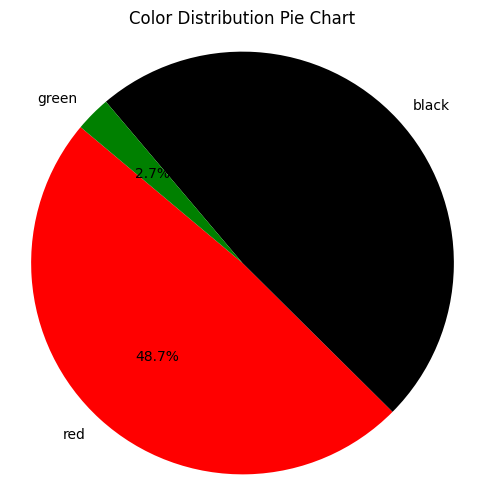

In [5]:
plt.figure(figsize=(6,6))
plt.pie(color_counts, labels=color_counts.index, colors=['red', 'black', 'green'], autopct='%1.1f%%', startangle=140)
plt.title("Color Distribution Pie Chart")
plt.axis('equal')  # Keep the pie chart circular
plt.show()

In [6]:
# Prepare labels and values
labels = color_counts.index.tolist()
values = color_counts.values.tolist()


colors =['red', 'black', 'green']

# Create pie chart
fig = go.Figure(
    go.Pie(
        labels=labels,
        values=values,
        hole=0.1,
        pull=[0.05] * len(values),  # "Explode" effect
        marker=dict(colors=colors, line=dict(color='white', width=2)),
        textinfo='label+percent',
    )
)

# Tilt effect (simulate 3D by rotating view)
fig.update_layout(
    title="Color Distribution Pie Chart",
    showlegend=False,
    margin=dict(t=80, l=50, r=50, b=50),
    height=600,
    width=600,
)

# This simulates a tilted effect with camera
fig.update_traces(rotation=120, direction='clockwise')

# Show it
fig.show()

### Color Frequency Analysis

After simulating 100,000 roulette spins, we evaluated the frequency distribution of each color (Red, Black, Green) to ensure that the simulation remains realistic and consistent with actual roulette probabilities.

#### Observed Results:

| Color  | Frequency (%) |
|--------|----------------|
| Red    | 48.89%         |
| Black  | 48.41%         |
| Green  | 2.70%          |

#### Interpretation:

- **Red and Black** are nearly balanced, each close to the theoretical value of ~48.65%.
- **Green (zero)** occurs at approximately 2.70%, which closely matches the expected probability of 1 in 37 (≈ 2.70%).
- No color exceeds 55%, which would indicate excessive skew or unrealistic bias.

#### Conclusion:

The color distribution is within normal bounds and reflects realistic roulette behavior. The data can be considered reliable for training reinforcement learning agents or conducting further analysis.


### Step 4: Save the Spin Data to a CSV File

After simulating all the spins, I save the results into a `.csv` file using pandas.

The filename includes the type of bias used (e.g., `roulette_spin_data_fair.csv` or `roulette_spin_data_color.csv`) so I can easily tell them apart later.

This dataset will be useful for:
- Training my reinforcement learning agent.
- Comparing how it performs on fair vs biased data.

## Even/Odd Distribution

In [7]:
# Even/Odd distribution
parity = df['Number'].apply(lambda x: 'even' if x != 0 and x % 2 == 0 else 'odd' if x != 0 else 'zero')
parity_counts = parity.value_counts(normalize=True)
print("\nParity Frequency (%):")
print(parity_counts * 100)


Parity Frequency (%):
Number
odd     48.6670
even    48.6272
zero     2.7058
Name: proportion, dtype: float64


/tmp/ipython-input-3644183523.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




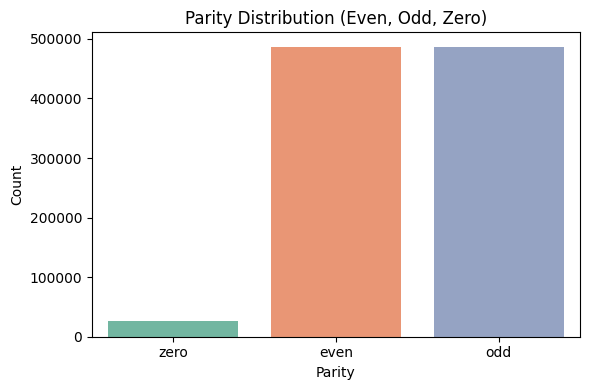

In [8]:
# plotting parity
df['Parity'] = df['Number'].apply(
    lambda x: 'even' if x != 0 and x % 2 == 0 else 'odd' if x != 0 else 'zero'
)

# Step 2: Plot barplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Parity', data=df, order=['zero', 'even', 'odd'], palette='Set2')

# Step 3: Label the plot
plt.title("Parity Distribution (Even, Odd, Zero)")
plt.xlabel("Parity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Parity Frequency Analysis

We analyzed the parity distribution (even vs. odd numbers) from the 100,000 simulated roulette spins. This helps validate whether the outcome probabilities are aligned with realistic roulette behavior.

#### Observed Results:

| Parity | Frequency (%) |
|--------|----------------|
| Odd    | 48.90%         |
| Even   | 48.40%         |
| Zero   | 2.70%          |

#### Interpretation:

- **Odd and even numbers** are nearly balanced, as expected in a fair European roulette wheel (excluding zero).
- **Zero** appears ~2.70% of the time, matching its theoretical probability of 1 in 37 spins.

#### Conclusion:

The parity distribution reflects realistic roulette behavior. There are no anomalies or excessive skew, so the dataset is suitable for training or analysis under fair or moderately biased conditions.

## Low/High Number Range

In [9]:
# Low/High number range
low_high = df['Number'].apply(lambda x: 'low' if 1 <= x <= 18 else 'high' if 19 <= x <= 36 else 'zero')
range_counts = low_high.value_counts(normalize=True)
print("\nLow/High Range Frequency (%):")
print(range_counts * 100)


Low/High Range Frequency (%):
Number
low     48.6522
high    48.6420
zero     2.7058
Name: proportion, dtype: float64


## Distribution of the Numbers

/tmp/ipython-input-2034492326.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




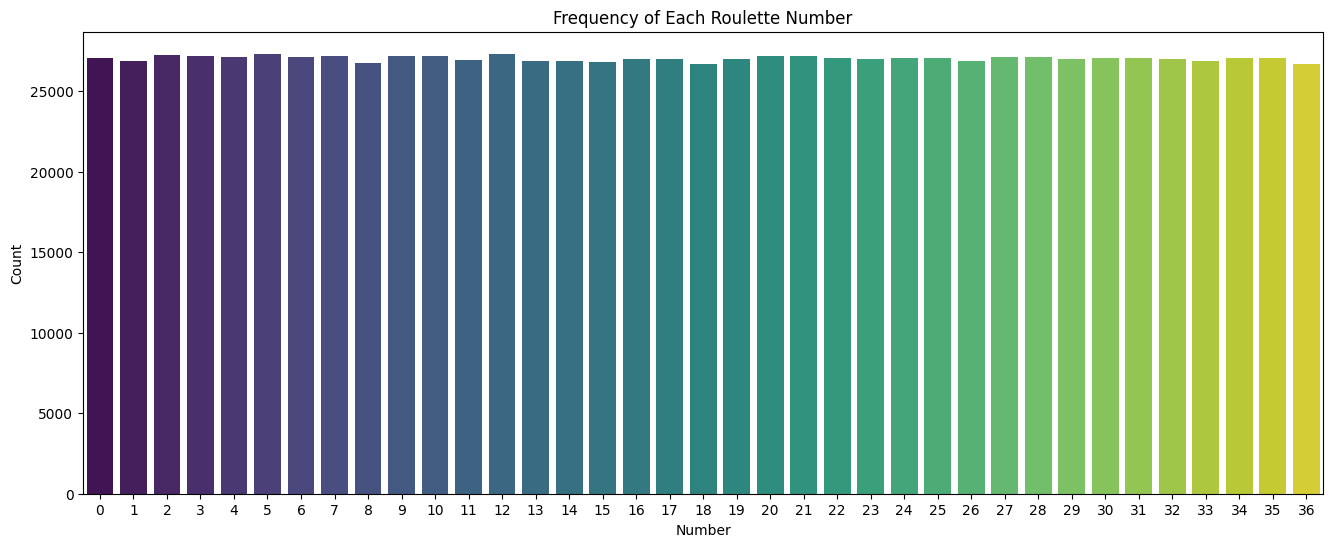

In [10]:
plt.figure(figsize=(16,6))
sns.countplot(x='Number', data=df, palette='viridis')
plt.title("Frequency of Each Roulette Number")
plt.xlabel("Number")
plt.ylabel("Count")
plt.show()

The distribution seem to be uniform. Hence, indicating the realistic simulation where all numbers have equal pprobability of occuring.

## Chi-Sq Test

In [11]:
from scipy.stats import chisquare

# Expected probabilities
expected_probs = [18/37, 18/37, 1/37]  # black, red, green
observed_counts = df['Color'].value_counts().reindex(['black', 'red', 'green'], fill_value=0).values
expected_counts = [p * len(df) for p in expected_probs]

# Perform chi-square test
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Roulette appears to be biased (statistically significant)")
else:
    print("Roulette appears fair (no significant bias)")


Chi-Square Statistic: 0.3681
P-value: 0.8319
Roulette appears fair (no significant bias)


In [12]:
# Check for potential unrealistic distributions
def check_threshold(label, dist, threshold=0.50):
    for k, v in dist.items():
        if v > threshold:
            print(f"⚠️ Warning: {label} '{k}' exceeds {threshold*100:.0f}% — check for unrealistic bias!")
            return
    print("Simulation is realsitic")

check_threshold("Color", color_counts)
check_threshold("Parity", parity_counts)
check_threshold("Range", range_counts)

Simulation is realsitic
Simulation is realsitic
Simulation is realsitic


In [13]:
bias_name = wheel.bias_type if wheel.bias_type else "fair"
df.to_csv(f"roulette_spin_data_{bias_name}.csv", index=False)
print(f"\n✅ Data saved to roulette_spin_data_{bias_name}.csv")


✅ Data saved to roulette_spin_data_fair.csv


### Summary

In this notebook, I:

1. Simulated a European roulette wheel with optional bias.
2. Generated thousands of realistic spin results.
3. Saved the data into CSV files for use in machine learning or analysis.

Next steps I might explore:
- Visualize the distribution of outcomes.
- Create an OpenAI Gym-style environment using this data.
- Train a reinforcement learning model to learn patterns (if any) from biased spins.

This setup gives me a flexible foundation to test how RL agents respond to both fair and unfair conditions.


| To \ From   | Standby (S) | Active (A) | Down (D) | Maintenance (M) |
|-------------|-------------|------------|----------|------------------|
| Standby (S) | 0.05        | 0.10       | 0.00     | 0.50             |
| Active (A)  | 0.93        | 0.86       | 0.00     | 0.10             |
| Down (D)    | 0.02        | 0.04       | 1.00     | 0.00             |
| Maint. (M)  | 0.00        | 0.00       | 0.00     | 0.40        